#Using A.I. to Detect Breast Cancer That Doctors Miss
-------------
Advancements in A.I. are beginning to deliver breakthroughs in breast cancer screening by detecting the signs that doctors miss. So far, the technology is showing an impressive ability to spot cancer at least as well as human radiologists, according to early results and radiologists, in what is one of the most tangible signs to date of how A.I. can improve public health.

[more information in The NewYork Times](https://www.nytimes.com/2023/03/05/technology/artificial-intelligence-breast-cancer-detection.html)

This project is based on the dataset published by [UCI MACHINE LEARNING](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data) available in Kaggle. The hottest project based on this dataset is developed by [BUDDHINI W](https://www.kaggle.com/code/buddhiniw/breast-cancer-prediction) which an excellent acccuracy about `94%` which looks perfect. However, in this repository, and more specifically in this notebook, you can gain the accuracy of `99.1%` on the test data.
####I hope you enjoy the project.


In [ ]:
#You need to first clone the repository 'Breast_Cancer_Prediction' from the
#link below:

!git clone https://github.com/F-Yousefi/Breast_Cancer_Prediction.git
%cd ./Breast_Cancer_Prediction

Cloning into 'Breast_Cancer_Prediction'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 0), reused 6 (delta 0), pack-reused 0
Receiving objects: 100% (10/10), 49.64 KiB | 558.00 KiB/s, done.
/content/Breast_Cancer_Prediction


In [ ]:
#We're going to use pandas and numpy, so let's import them now.

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Let's first read the dataset which is saved in the form of .csv file.
dataset = pd.read_csv('./dataset/breast-cancer-wisconsin-data/data.csv')
dataset.head() # this command will preview five top rows of the dataset.

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#this command print a concise summary of the information about the dataset including
#the index dtype and columns, non-null values and memory usage.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#this command analyse the data stored in each column of the dataset including
#maximum value, minimum value, mean, count, standard deviation, and normal distribution.

dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
#We should be so careful about null and nan values in any datasets.
#We can make sure there is no nan or null values in the dataset using this command.
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
#As you can also see, the last column of the dataset is filled with nan or null values.
#We should drop the column from our dataset.
#In pandas we do this using the command dorpna which is actually drop+nan-> dropna().
dataset = dataset.dropna(axis=1)

In [ ]:
#Over this project, we don't need the information provided by the id column.
dataset.drop(columns=["id"],inplace = True)

In [ ]:
#Sometimes we need to know more about a specific feature of all samples.
#For example, we want to know what percentage of the patients are suffering from
#melignant cancer or malignant and benign.
mb = dataset['diagnosis'].value_counts(normalize=True)*100
# Benign : 63%
# Malignant: 37%
f"Benign :{round(mb[0],1)}% , Malignant: {round(mb[1],1)}%"

'Benign :62.7% , Malignant: 37.3%'

In [ ]:
#Let's now convert all of the columns of the dataset into integer, so that we can
#use the dataset in the future model or further calculations.
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(dataset.diagnosis)
dataset['diagnosis'] = le.transform(dataset.diagnosis) #if the case is known as Malignant 1, otherwise 0

##Visualization
------
It is to build up an intuitive understanding for youself and everyone else using this dataset. This way, you can have an imagination of how ML algorithm would behave. In addition, you can find the outlier more easier. Removing all the outliers will help your model converge better and faster.

------

In [ ]:
#In this stage, we should separate the input data (features) and output data (inferences)
x_train, y_train = dataset[dataset.columns[1:]],dataset[dataset.columns[0]]

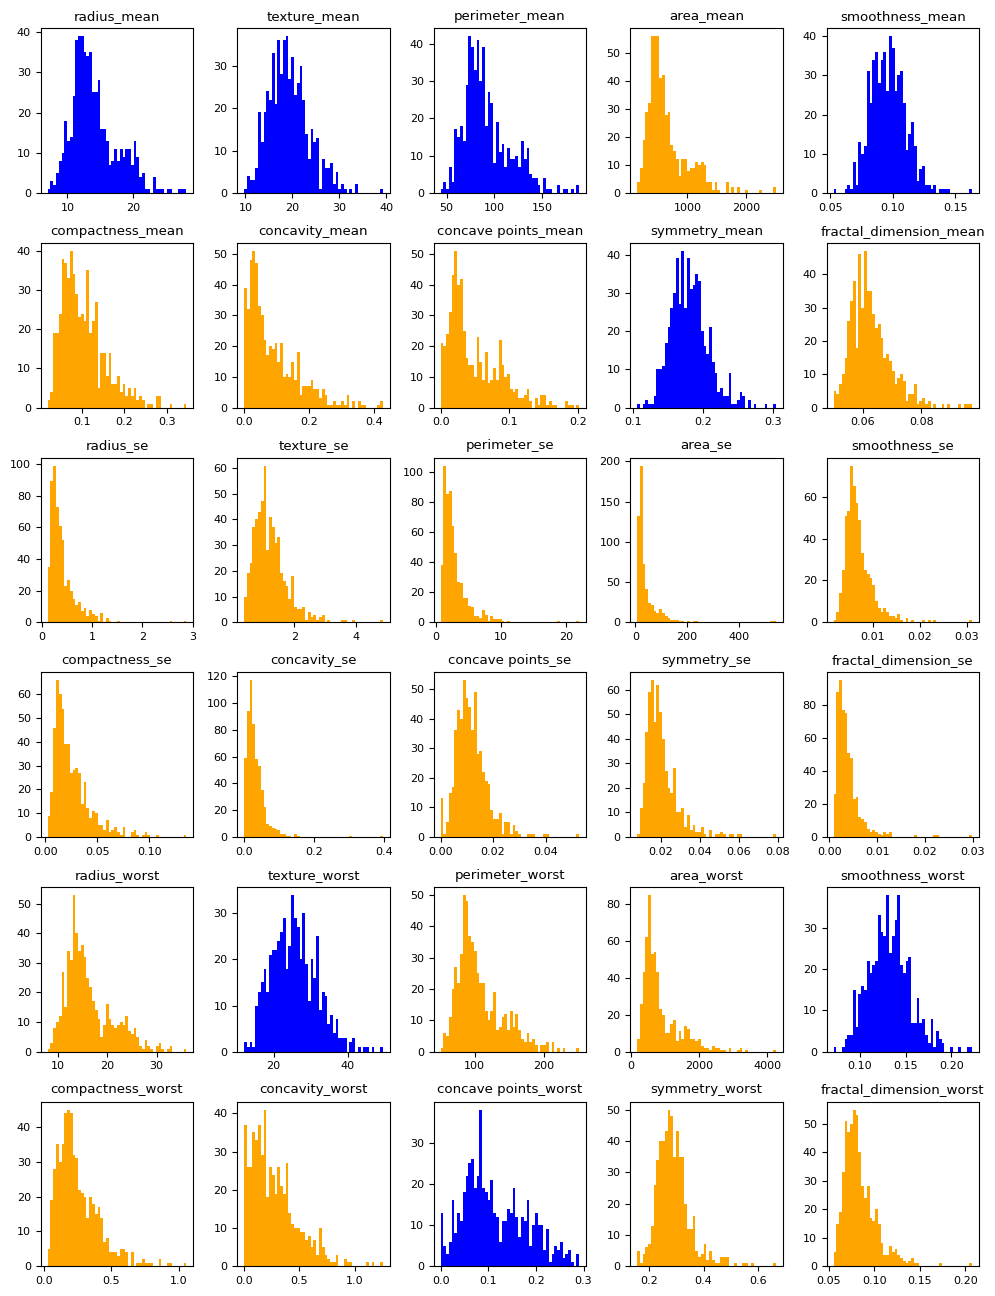

In [ ]:
# As you can see yourself, there are only eight features in our dataset that
# have skewness under 1. To aquire a more accurate predict, we should reduce
# the skewness of each feature as much as possible.

import matplotlib.pyplot as plt
import seaborn as sns
from colour import Color


plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(10,13))
axes = axes.ravel()
i = 0
for idx,ax in enumerate(axes):
  if x_train[x_train.columns[idx]].skew() > 1 : color="#ffa500"
  else : color="b"
  ax.figure
  ax.hist(x_train[x_train.columns[idx]],bins= 50, color=color)
  ax.set_title(x_train.columns[idx])
plt.tight_layout()
plt.show()


In [ ]:
# Our first option to reduce the skewness of the features is to remove
# all outliers of the dataset.

from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(x_train)
mask = yhat != -1

x_train_free, y_train_free = x_train[mask], y_train[mask]

print(f"The shape of the dataset including outliers: {x_train.shape}")
print(f"The shape of the dataset free of outliers: {x_train_free.shape}")
print(f"The number of outliers: {x_train.shape[0] - x_train_free.shape[0]}")
print(f"The percentage of outliers: {((x_train.shape[0] - x_train_free.shape[0]) /x_train.shape[0] * 100):.2f} %")
print(f"The skewness of the dataset reduced form {np.mean(x_train.skew()):.2f} to {np.mean(x_train_free.skew()):.2f}")

The shape of the dataset including outliers: (569, 30)
The shape of the dataset free of outliers: (512, 30)
The number of outliers: 57
The percentage of outliers: 10.02 %
The skewness of the dataset reduced form 1.74 to 0.99


In [ ]:
#Another option would be to transform our features to normal distribution:
# To do so, we are going to use boxcox method which returns our dataset transformed by a power transformation.
from scipy.stats import boxcox


all_powers = [-1, -0.5, 0, 0.5, 1]

for f in x_train_free.columns:
  ndl = []
  for bcv in all_powers:
    ndf = pd.DataFrame(boxcox(x_train_free[f] + 0.0001,bcv))
    ndl.append({"skewness":abs(ndf.skew()[0]),"bcv":bcv})

  ndl = pd.DataFrame(ndl)
  x_train_free[f][:] = boxcox(x_train_free[f] + 0.0001,ndl["bcv"][np.argmin(ndl['skewness'])])


x_train_free.skew()

radius_mean                0.007811
texture_mean               0.010664
perimeter_mean            -0.012569
area_mean                  0.247047
smoothness_mean           -0.090172
compactness_mean          -0.173596
concavity_mean             0.245084
concave points_mean        0.210823
symmetry_mean              0.031852
fractal_dimension_mean     0.095656
radius_se                 -0.183015
texture_se                -0.088271
perimeter_se              -0.190226
area_se                   -0.107222
smoothness_se             -0.195070
compactness_se            -0.206249
concavity_se              -0.051729
concave points_se         -0.465317
symmetry_se                0.069443
fractal_dimension_se       0.154031
radius_worst              -0.080072
texture_worst              0.123436
perimeter_worst           -0.133914
area_worst                -0.095939
smoothness_worst          -0.110433
compactness_worst         -0.242290
concavity_worst           -0.035251
concave points_worst      -0

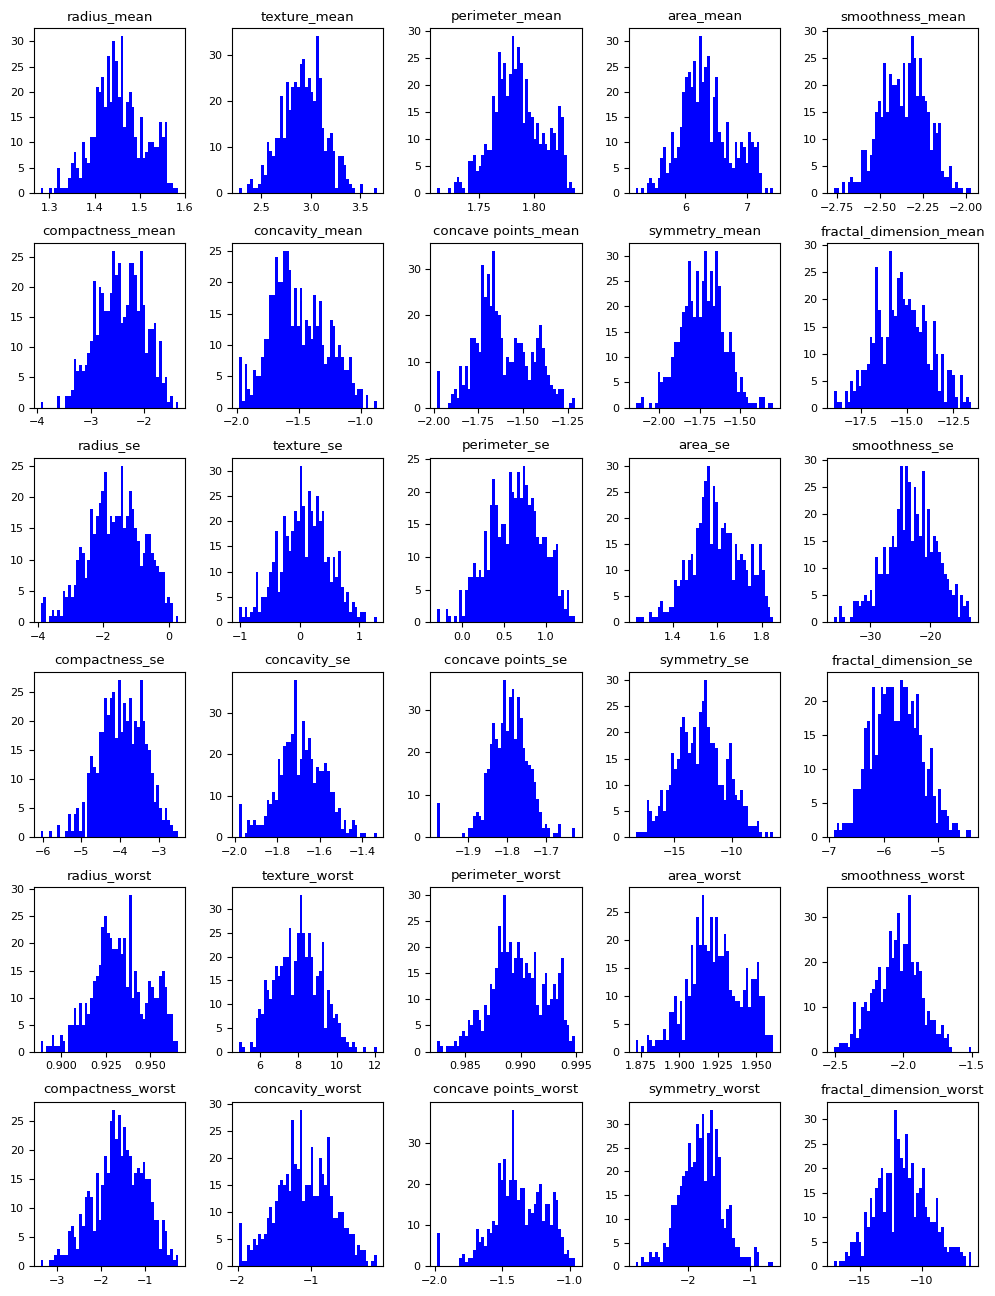

In [ ]:
# All the features now have skewness lower than zero.
import matplotlib.pyplot as plt
import seaborn as sns
from colour import Color


plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(10,13))
axes = axes.ravel()
i = 0
for idx,ax in enumerate(axes):
  if x_train_free[x_train_free.columns[idx]].skew() > 1 : color="#ffa500"
  else : color="b"
  ax.figure
  ax.hist(x_train_free[x_train_free.columns[idx]],bins= 50, color=color)
  ax.set_title(x_train_free.columns[idx])
plt.tight_layout()
plt.show()


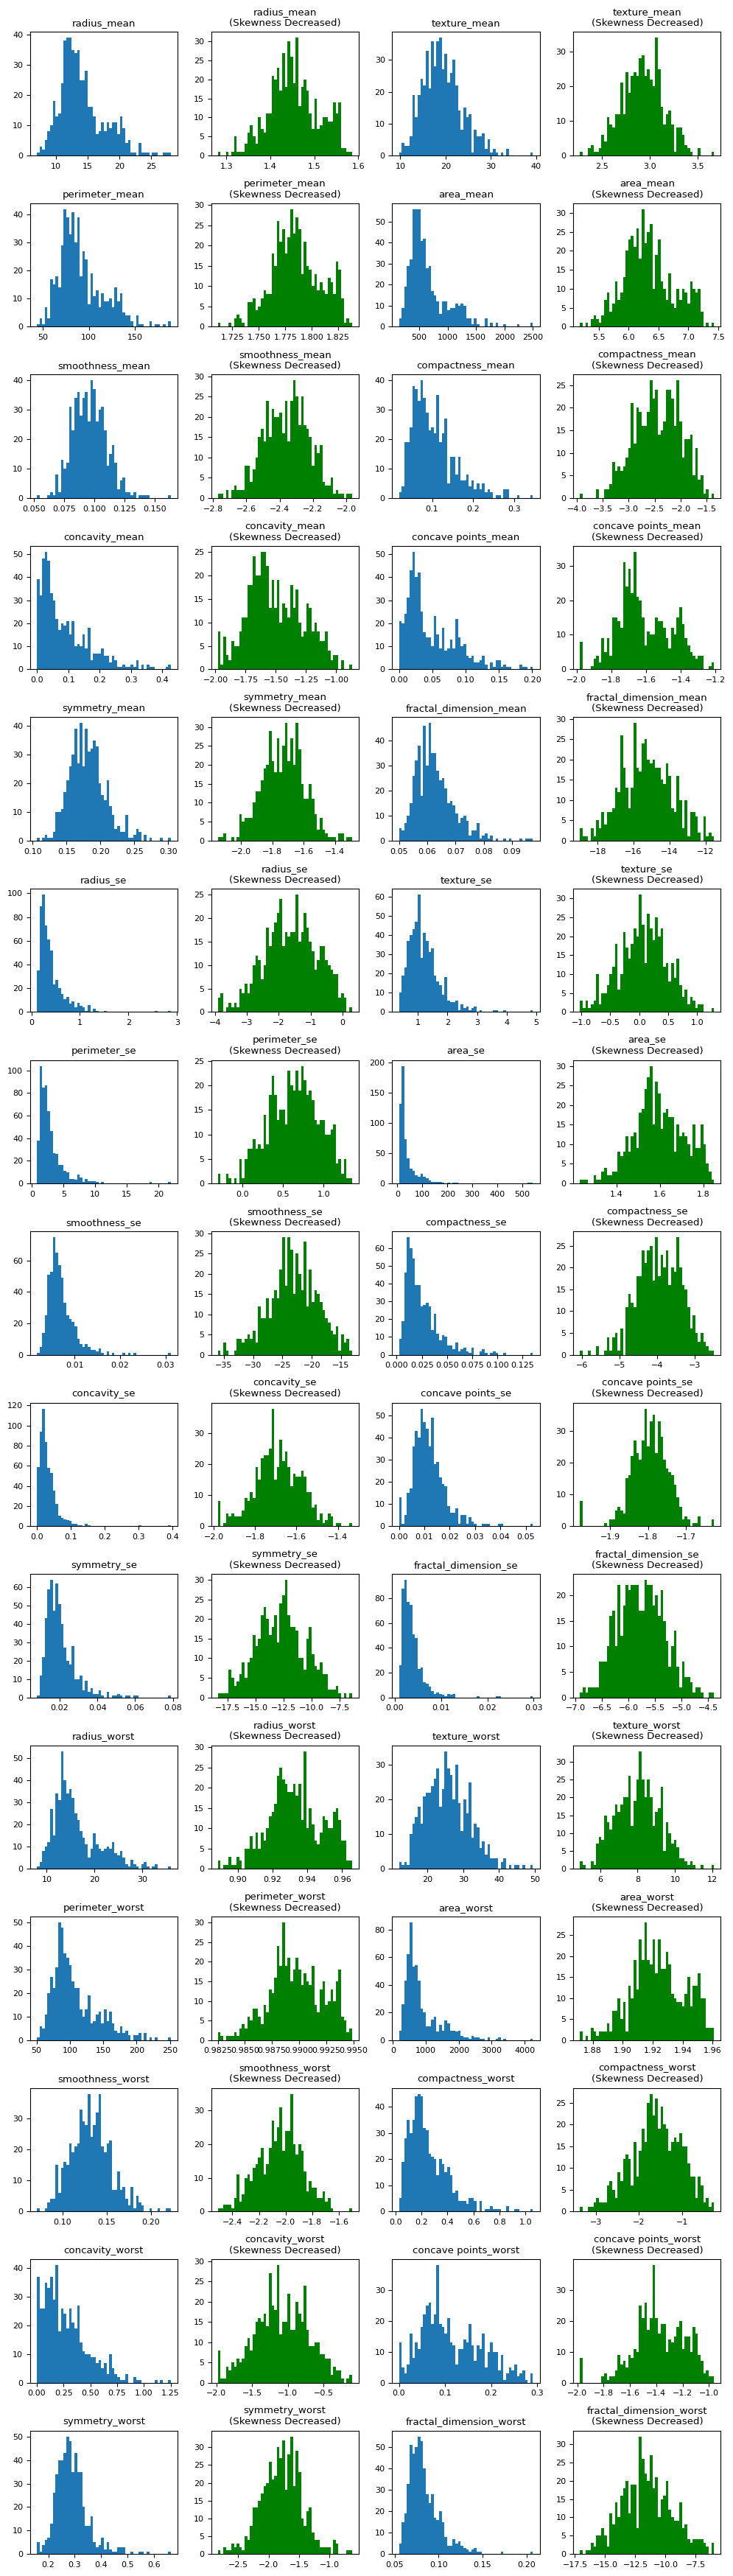

In [ ]:
#The histogram plot corresponding to each feature.
#After and before transforming to Normal Distribution.
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=15, ncols=4, figsize=(10,35))
axes = axes.ravel()
i = 0
for idx,ax in enumerate(axes):
    if i % 2 ==0:
      ax.figure
      ax.hist(x_train[x_train.columns[int(idx/2)]],bins= 50)
      ax.set_title(x_train.columns[int(idx/2)])
    else:
      ax.figure
      ax.hist(x_train_free[x_train_free.columns[int(idx/2)]],bins= 50,color='g')
      ax.set_title(f"{x_train_free.columns[int(idx/2)]}\n(Skewness Decreased)")
    i+=1
plt.tight_layout()
plt.show()

In [ ]:
#Now, we normalize our dataset.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_free[:] = scaler.fit_transform(x_train_free)


In [ ]:
# dataset is splitted into test data and  train data.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train_free, y_train_free, test_size=0.2, random_state=40)

In [ ]:
#All hyperparameters are generated using 'Hyperparameter Tuning Method'
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=20,min_samples_split=2, max_depth=10, max_features=2,bootstrap=True,min_samples_leaf=1)
model.fit(x_train,y_train)
acc = model.score(x_test,y_test)
print(f"Random Forest Classifier Train Accuracy: {model.score(x_train,y_train)*100:.2f}%")
print(f"Random Forest Classifier Test Accuracy: {model.score(x_test,y_test)*100:.2f}%")


Random Forest Classifier Train Accuracy: 99.76%
Random Forest Classifier Test Accuracy: 99.03%


#A Brief Explanation of Hyperparameter Tuning
-----
The best way to think about hyperparameters is like the settings of an algorithm that can be adjusted to optimize performance. While model parameters are learned during training — such as the slope and intercept in a linear regression — hyperparameters must be set by the data scientist before training. In the case of a random forest, hyperparameters include the number of decision trees in the forest and the number of features considered by each tree when splitting a node.[ For more information click here](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)


-----------

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.arange(start = 2, stop = 20, step = 2)]
max_features = [2]
max_depth = [int(x) for x in np.arange(start = 2, stop = 20, step = 2)]
max_depth.append(None)
min_samples_split = [1, 2, 3]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

[f"{key} : {value}" for key, value in random_grid.items()]

['n_estimators : [2, 4, 6, 8, 10, 12, 14, 16, 18]',
 'max_features : [2]',
 'max_depth : [2, 4, 6, 8, 10, 12, 14, 16, 18, None]',
 'min_samples_split : [1, 2, 3]',
 'min_samples_leaf : [1, 2, 4]',
 'bootstrap : [True, False]']

In [ ]:
#Randomized search on hyper parameters.

#RandomizedSearchCV implements a "fit" and a "score" method.
#It also implements "score_samples", "predict", "predict_proba",
#"decision_function", "transform" and "inverse_transform" if they are
#implemented in the estimator used.
#The parameters of the estimator used to apply these methods are optimized
#by cross-validated search over parameter settings.

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=1, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)

[print(f"{key} : {value}") for key, value in rf_random.best_params_.items()]
print(f"Best Accuracy: {rf_random.best_score_:.2f}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
n_estimators : 16
min_samples_split : 2
min_samples_leaf : 4
max_features : 2
max_depth : 14
bootstrap : False
Best Accuracy: 99.10
